In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

from mixed_naive_bayes import MixedNB
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [90]:
df = pd.read_csv('./persona_hogares_nuevo.csv')

In [91]:
df.head()
df.tail()

,folio,depto,area,nro,genero,edad,dianac,mesnac,anionac,relacionjefehogar,...,yhog,yhogpc,z,zext,pcero,puno,pdos,pextcero,pextuno,pextdos
39600,953-12108090472-A-0031,Pando,Rural,4,2.Mujer,13,26,4,2006,3.HIJO/A O ENTENADO/A,...,2165,433,668.099976,381.079987,Pobre,0.351893,0.123829,No pobre extremo,0,0
39601,953-12108090472-A-0051,Pando,Rural,3,1.Hombre,7,1,11,2012,9.NIETO/NIETA,...,5564.67,1854.89,668.099976,381.079987,No pobre,0,0,No pobre extremo,0,0
39602,953-12108090472-A-0061,Pando,Rural,2,2.Mujer,22,1,9,1997,2.ESPOSA/O O CONVIVIENTE,...,1500,500,668.099976,381.079987,Pobre,0.251609,0.0633071,No pobre extremo,0,0
39603,953-12108090472-A-0071,Pando,Rural,4,1.Hombre,17,11,9,2002,3.HIJO/A O ENTENADO/A,...,4500,900,668.099976,381.079987,No pobre,0,0,No pobre extremo,0,0
39604,953-12108090472-A-0071,Pando,Rural,5,1.Hombre,18,9,9,2001,10.OTRO PARIENTE,...,4500,900,668.099976,381.079987,No pobre,0,0,No pobre extremo,0,0


In [65]:
df.dtypes

folio       object
depto       object
area        object
nro          int64
genero      object
             ...  
puno        object
pdos        object
pextcero    object
pextuno     object
pextdos     object
Length: 180, dtype: object

In [61]:
df['phrs'] = df['phrs'].astype(int)

ValueError: invalid literal for int() with base 10: ' '

In [92]:
# ver las variables del dataset
list(df.columns)
#df.info()

['folio',
 'depto',
 'area',
 'nro',
 'genero',
 'edad',
 'dianac',
 'mesnac',
 'anionac',
 'relacionjefehogar',
 'idiomauno',
 'idiomados',
 'idiomanativo',
 'estadocivil',
 'dondehace5anios',
 'pertenecepueblooriginario',
 'pueblooriginario',
 'tieneenfermedad',
 'enfermadodocemeses',
 'acudiodocecaja',
 'acudiodocepublico',
 'acudiodoceprivados',
 'acudiodocemisalud',
 'acudiodocedomicilio',
 'acudiodocetradicional',
 'acudiosinreceta',
 'afiliadoseguro',
 'dificultadlentes',
 'dificultadauditivo',
 'dificultadcomunicacion',
 'dificultadapoyocaminar',
 'dificultadconcentracion',
 'dificultadapoyoapoyo',
 'dificultadentenderrealidad',
 'estuvoembarazada',
 'numeroembarazos',
 'hijos',
 'hijosvivos',
 'quienatendioparto',
 'dondeatendioparto',
 'partoatendiocaja',
 'bonoazurduy',
 'treintaactividadfisicatrabajo',
 'treintamcaminatrabajo',
 'ejercicioregular',
 'deportepractica',
 'ininstalaciontipopublico',
 'ininstalaciontipopublicocosto',
 'instalacionprivada',
 'instalacionabierta'

In [67]:
df.shape

(39605, 180)

### Análisis Exploratorio de Datos
#### Escogiendo nuestra variable dependiente

Se desea proyectar la condición laboral de las personas

In [93]:
# renombramos la columna condicion laboral
df = df.rename(columns={'condact': 'target_y'})

In [94]:
df['target_y'].value_counts()

p_ocupado       19151
p_permanente     9715
p_temporal       4396
p_cesante         656
p_aspirante       318
Name: target_y, dtype: int64

In [51]:
# quitar la poblacion economicamente pasiva
df2 = df.loc[df['target_y'] != pd.NA]

In [85]:
df2['target_y'].value_counts()

p_ocupado       19151
p_permanente     9715
                 5369
p_temporal       4396
p_cesante         656
p_aspirante       318
Name: target_y, dtype: int64

### Evaluando variables

In [16]:
df['nivedg'].value_counts()

Secundaria    13532
Primaria      10998
Superior       8062
Ninguno        4003
               2873
Otros           137
Name: nivedg, dtype: int64

In [53]:
df['ingresoocupacionprincipal'].value_counts()
# entra porque uno esta ocupado es pq gana directo

         31149
200        296
3000       296
150        292
100        276
         ...  
3650         1
1620         1
16500        1
1339         1
5550         1
Name: ingresoocupacionprincipal, Length: 792, dtype: int64

In [21]:
df['aestudio'].value_counts()
# variable ayuda a que la persona este trabajando

12    5909
0     4003
17    3489
      2903
5     2736
3     2024
8     1740
4     1675
10    1651
2     1637
6     1560
11    1465
7     1451
1     1394
9     1346
14    1292
15    1279
13     945
16     655
18     227
19     189
22      28
21       6
20       1
Name: aestudio, dtype: int64

In [19]:
df['quienatenparto'].value_counts()

                          36152
Atención Institucional     3294
Otro                        125
Atención Partera             29
Médico Tradicional            5
Name: quienatenparto, dtype: int64

Text(0, 0.5, 'Frecuencia de personas')

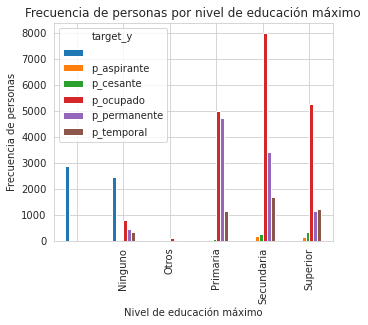

In [26]:
pd.crosstab(df.nivedg,df.target_y).plot(kind='bar')
plt.title('Frecuencia de personas por nivel de educación máximo')
plt.xlabel('Nivel de educación máximo')
plt.ylabel('Frecuencia de personas')

In [ ]:
#  primaria secundaria superior tienen alta frecuencia con ocupados permanentes y temporales

Text(0, 0.5, 'Frecuencia de personas')

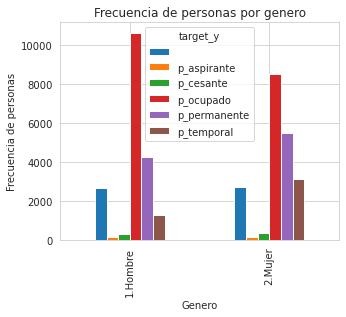

In [54]:
pd.crosstab(df.genero,df.target_y).plot(kind='bar')
plt.title('Frecuencia de personas por genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia de personas')

In [57]:
df.replace(to_replace = '?', value = np.NaN, inplace = True)
# contabilizamos el porcentaje de NaN
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

# se obsevan datos completos (cero NaN)
df_vars = missing_data[missing_data['Percent']==0]
nombres = df_vars.index.tolist()
nombres = np.sort(nombres)
print(nombres)
nombres[0:2]
# Todo con fin de ver la variable dependiente "y" y tambien las variables independientes

                              Total   Percent
deportepractica               30957  0.781644
actividadempresa              20459  0.516576
ocupacionsemanapasada         20454  0.516450
ocupacionsemanapasadacodigo   20454  0.516450
actividadempresacodigo        20454  0.516450
...                             ...       ...
disponibletrabajarmashoras        0  0.000000
deseatrabajarmashoras             0  0.000000
frecuenciaocupacionprincipal      0  0.000000
ingresoocupacionprincipal         0  0.000000
folio                             0  0.000000

[180 rows x 2 columns]
['actualmenteasiste' 'acudiodocecaja' 'acudiodocedomicilio'
 'acudiodocemisalud' 'acudiodoceprivados' 'acudiodocepublico'
 'acudiodocetradicional' 'acudiosinreceta' 'aestudio' 'afiliado'
 'afiliadoafp' 'afiliadoseguro' 'aguinaldoultimoanio' 'amenazaron'
 'anionac' 'aportaafp' 'area' 'aspirante' 'bebe' 'bonoazurduy'
 'bonojuancitopinto' 'burlaron' 'caebop' 'cesante' 'cmasi' 'cobersalud'
 'cobop' 'depto' 'deseatrabajarmash

array(['actualmenteasiste', 'acudiodocecaja'], dtype='<U29')

In [ ]:
# existen buena relacion de discrimiladidad entre la target del sexo, existe alta frecuencia entre genero y personal ocupado

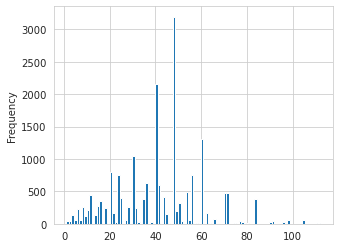

In [71]:
##pd.crosstab(df.phrs, df.target_y).plot(kind='bar')
plt = df['phrs'].plot.hist(bins= 100)
#plt.title('Frecuencia  por hora trabajadas')
#plt.xlabel('Genero')
#plt.ylabel('Frecuencia')

### Recategorizacion de variables

In [95]:

label_encoder = preprocessing.LabelEncoder()
df['target_y'] = label_encoder.fit_transform(df['target_y'])
#df['edad_e'] = label_encoder.fit_transform(df['edad'])
df['genero_e'] = label_encoder.fit_transform(df['genero'])
#df['phrs_e'] = label_encoder.fit_transform(df['phrs'])
#df['aestudio_e'] = label_encoder.fit_transform(df['aestudio'])
df['hijos_e'] = label_encoder.fit_transform(df['hijos'])
#df['leeescribe_e'] = label_encoder.fit_transform(df['leeescribe'])
df['relacionjefehogar_e'] = label_encoder.fit_transform(df['relacionjefehogar'])
#df['interhouse'] = label_encoder.fit_transform(df['internet_casa'])

df.head()

,folio,depto,area,nro,genero,edad,dianac,mesnac,anionac,relacionjefehogar,...,zext,pcero,puno,pdos,pextcero,pextuno,pextdos,genero_e,hijos_e,relacionjefehogar_e
0,111-00416110273-A-0021,Chuquisaca,Urbana,1,1.Hombre,42,10,2,1977,1.JEFE O JEFA DEL HOGAR,...,494.549988,Pobre,0.452791452407837,0.205020099878311,No pobre extremo,0,0,0,0,0
1,111-00416110273-A-0031,Chuquisaca,Urbana,1,1.Hombre,44,20,5,1975,1.JEFE O JEFA DEL HOGAR,...,494.549988,Pobre,0.120382636785507,0.014491979032755,No pobre extremo,0,0,0,0,0
2,151-03374505336-D-0091,Chuquisaca,Rural,6,1.Hombre,4,6,1,2015,3.HIJO/A O ENTENADO/A,...,381.079987,Pobre,0.820697963237762,0.673545122146606,Pobre extremo,0.685652136802673,0.470118850469589,0,0,6
3,111-00416110273-A-0051,Chuquisaca,Urbana,1,1.Hombre,41,23,11,1978,1.JEFE O JEFA DEL HOGAR,...,494.549988,Pobre,0.311712920665741,0.097164943814278,No pobre extremo,0,0,0,0,0
4,111-00416110273-A-0051,Chuquisaca,Urbana,2,2.Mujer,31,30,8,1988,2.ESPOSA/O O CONVIVIENTE,...,494.549988,Pobre,0.311712920665741,0.097164943814278,No pobre extremo,0,0,1,8,5


In [29]:
df['target_y'].value_counts()

3    19151
4     9715
0     5369
5     4396
2      656
1      318
Name: target_y, dtype: int64

### Crear otro dataframe df1 con las variables interesadas

In [108]:
nomcol = ['edad','genero_e','hijos_e','relacionjefehogar_e', 'ingresoocupacionprincipal', 'aestudio','target_y']
df1=df[nomcol]
df1.head()

,edad,genero_e,relacionjefehogar_e,ingresoocupacionprincipal,aestudio,target_y
0,42,0,0,0,17,2
1,44,0,0,0,16,2
2,4,0,6,0,0,5
3,41,0,0,900,6,2
4,31,1,5,0,4,2


In [119]:
X= df1[df1.columns[:-1]]
y= df1['target_y']
X.head()

,edad,genero_e,relacionjefehogar_e,ingresoocupacionprincipal,aestudio
0,42,0,0,0,17
1,44,0,0,0,16
2,4,0,6,0,0
3,41,0,0,900,6
4,31,1,5,0,4


### Aplicación de Naive Bayes

In [120]:
# preparacion de la data de aprendizaje y de testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [121]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


In [122]:
y_pred

array([3, 3, 4, ..., 4, 2, 3])

In [118]:
# inicializacion de la técnica
#clf = MixedNB(categorical_features=[0,1,2,3,4])
# aplicación 
#clf.fit(X_train,y_train)
# aplicacion de la técnica de naive bayes en modo testeo (predicción)
#y_pred = clf.predict(X_test)
#y_pred

### Evaluación de la técnica de Naive Bayes

In [123]:
# calcular la precisión de la técnica
print(accuracy_score(y_test, y_pred))

0.6329742467598047


### Conclusiones
    - Con la técnica de Naive Bayes se puede clasificar la condicion laboral de las personas